In [1]:
%%time
from main import *
import numpy as np
import cv2
import doctest
import glob


x = []
masks = []
for m in np.sort(glob.glob('**/mask*.png', recursive=True)):
    masks.append(cv2.imread(m, cv2.IMREAD_GRAYSCALE))
for i in np.sort(glob.glob('**/image*.png', recursive=True)):
    x.append(cv2.imread(i))

alpha = 255
beta = 1
q = np.array([alpha*(1-np.where(m>0, 1, m)) for m in masks])
g = np.zeros((5,5,1000,999))
for i in range(4):
    for j in range(i+1,5):
        x_diff = np.sum(np.abs(x[i]-x[j]), axis=2)
        g[i,j] = beta*(x_diff[:,:-1]+x_diff[:,1:]) 
        g[j,i] = g[i, j]

f = np.zeros((1000, 5, 1000))
for j in range(999):
    f[j+1] = np.min(q[:,:, 999-j]+f[j]+g[:,:,:,998-j], axis=1)


# will store best pic to pick from
k_best = np.zeros((1000,1000)).astype(int)
k_best[0] = np.argmin(q[:,:,0]+f[-1], axis=0)
for i in range(1, 999):
    g_ = np.take_along_axis(g[:,:,:,i-1], k_best[i-1][None,None,:], axis=0)[0]
    val = q[:,:,i]+g_+f[998-i]
    k_best[i]=np.argmin(val, axis=0)

# sum pictures
x = np.array(x)
res = np.take_along_axis(x, k_best.T[None, :,:, None], axis=0)[0]

cv2.imwrite('5.png', res)


Wall time: 1.71 s


True

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

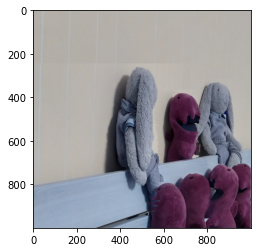

In [3]:
plt.imshow(res)

In [2]:
a = np.reshape(np.arange(300), (3,10,10))
b = np.ones((3,3,10,10))

In [4]:
(a[:,:,-1]+b[:,:,:,-1]).shape

(3, 3, 10)

In [5]:
np.min(a[:,:,-1]+b[:,:,:,-1]+0, axis=1)

array([[ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.],
       [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.],
       [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]])

In [4]:
np.sort(glob.glob('**/mask*.png', recursive=True))

array(['data\\mask_01.png', 'data\\mask_02.png', 'data\\mask_03.png',
       'data\\mask_04.png', 'data\\mask_05.png'], dtype='<U16')

In [9]:
c = np.arange(1,4)[:,None,None, None]*b[:,:,:]
idx = np.array([0,1,0,2,0,0,0,0,0,0])

In [14]:
(np.take_along_axis(c[:,:,:,-1], idx[None,None,:], axis=0)[0][0]==np.array([1., 2., 1., 3., 1., 1., 1., 1., 1., 1.])).all()

True

In [12]:
c[:,:,:,-1]

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]]])

In [13]:
[1., 2., 1., 3., 1., 1., 1., 1., 1., 1.]*3

[1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [22]:
testx = np.reshape(np.arange(1500), (5,10,10, 3))

In [23]:
k = np.array([[0,1,0,0,0,0,0,0,0,0]]*10)

In [24]:
k

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [29]:
 np.take_along_axis(testx[:,:,:, :], k[None, :, :, None], axis=0)[0][0,:,0]

array([  0, 303,   6,   9,  12,  15,  18,  21,  24,  27])